This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

**Key Features:**
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

**Packages:** importing the most usefull packages to perform data exploration and visualization data

In [297]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb

**Upload and first check at the data**

In [21]:
spotify_songs_df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
spotify_songs_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [22]:
spotify_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [23]:
spotify_songs_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [25]:
spotify_songs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [268]:
spotify_songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18


In [269]:
spotify_songs_df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,E,Minor,61,32,67,15,0,11,5,2022-11-04


In [306]:
spotify_songs_df.shape

(953, 25)

In [307]:
spotify_songs_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'released_date'],
      dtype='object')

**Null values handling**

In [27]:
spotify_songs_df.dropna()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [29]:
spotify_songs_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

I need to remove the null components of the in_shazam_charts and key columns

In [64]:
in_shazam_charts_mode = spotify_songs_df['in_shazam_charts'].mode()[0]
spotify_songs_df.fillna(in_shazam_charts_mode, inplace=True)
key_mode = spotify_songs_df['key'].mode()[0]
spotify_songs_df.fillna(key_mode, inplace=True)

In [65]:
spotify_songs_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

I removed the null components by replacing them with the mode value

In [362]:
# Rimuovi i caratteri non numerici dalla colonna in_shazam_charts e converti i valori in numeri
spotify_songs_df['in_shazam_charts'] = spotify_songs_df['in_shazam_charts'].str.replace(r'\D', '', regex=True).astype(float)

# Calcola la media dei valori nella colonna in_shazam_charts
mean_shazam_charts = spotify_songs_df['in_shazam_charts'].mean()

In [365]:
spotify_songs_df['in_shazam_charts'].mean()

56.84784889821616

In [370]:
spotify_songs_df['streams']

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [372]:
# Rimuovi i caratteri non numerici dalla colonna streams e converti i valori in numeri
spotify_songs_df['streams'] = spotify_songs_df['streams'].str.replace(r'\D', '', regex=True).astype(float)

# Calcola la media dei valori nella colonna streams
mean_streams = spotify_songs_df['streams'].mean()

In [374]:
spotify_songs_df['streams'].mean()

12112503461.400839

**Show some interesting plots**

Creo una nuova colonna combinando le colonne released_year, released_month e released_day in una singola colonna per vedere esattamente la data completa dell'uscita della canzone

In [84]:
spotify_songs_df['released_date'] = pd.to_datetime(spotify_songs_df['released_year'].astype(str) + '-' + spotify_songs_df['released_month'].astype(str) + '-' + spotify_songs_df['released_day'].astype(str))
spotify_songs_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


Grafico a dispersione per visualizzare la distribuzione delle date di uscita nel tempo

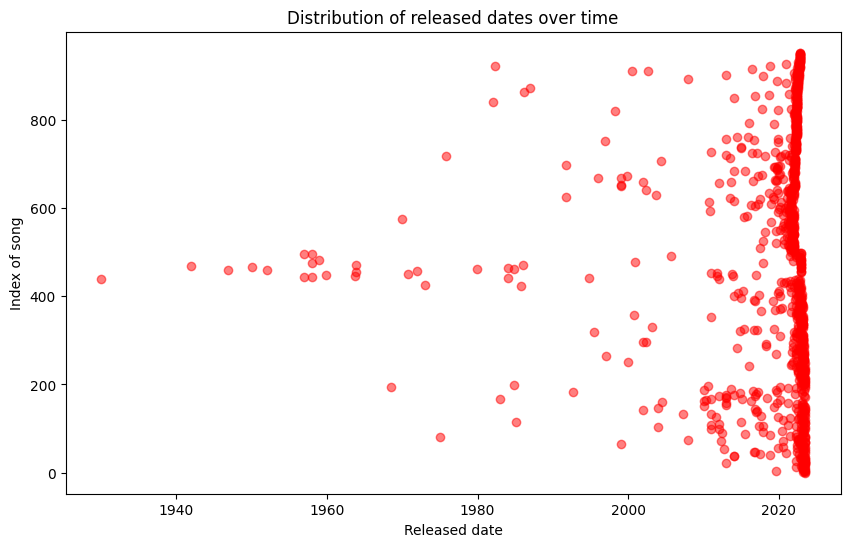

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(spotify_songs_df['released_date'], spotify_songs_df.index, color='red', alpha=0.5)
plt.title('Distribution of released dates over time')
plt.xlabel('Released date')
plt.ylabel('Index of song')
plt.show()

alpha=0.5 imposta la trasparenza dei punti del grafico a dispersione su 0.5 per renderli leggermente trasparenti

possiamo osservare che la maggior parte delle canzoni sono state create negli ultimi anni

Grafico a barre per mostrare quante canzoni sono state rilasciate in ciascun anno

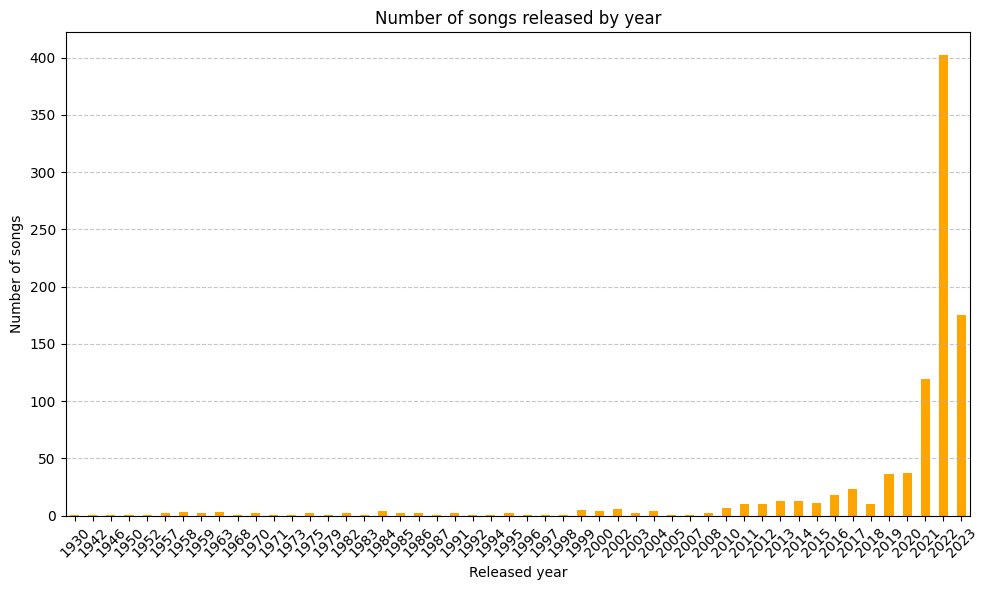

In [100]:
count_by_year = spotify_songs_df['released_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
count_by_year.plot(kind='bar', color='orange')
plt.title('Number of songs released by year')
plt.xlabel('Released year')
plt.ylabel('Number of songs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) #griglia solo su asse y, stile: riga tratteggiata, trasparenza: 70% (0 trasparente, 1 opaco)
plt.tight_layout() #regola automaticamente la posizione degli assi del grafico in modo che non si sovrappongano e che il contenuto sia distribuito uniformemente
plt.show()

Per visualizzare la distribuzione delle statistiche di streaming utilizzo un istogramma con la libreria matplotlib

In [375]:
streams = spotify_songs_df['streams'].value_counts()
streams

streams
7.238945e+08    2
1.563386e+08    2
1.223481e+09    2
3.955914e+08    2
1.695712e+09    1
               ..
1.357609e+09    1
2.943521e+08    1
9.721650e+08    1
9.200457e+08    1
9.600739e+07    1
Name: count, Length: 949, dtype: int64

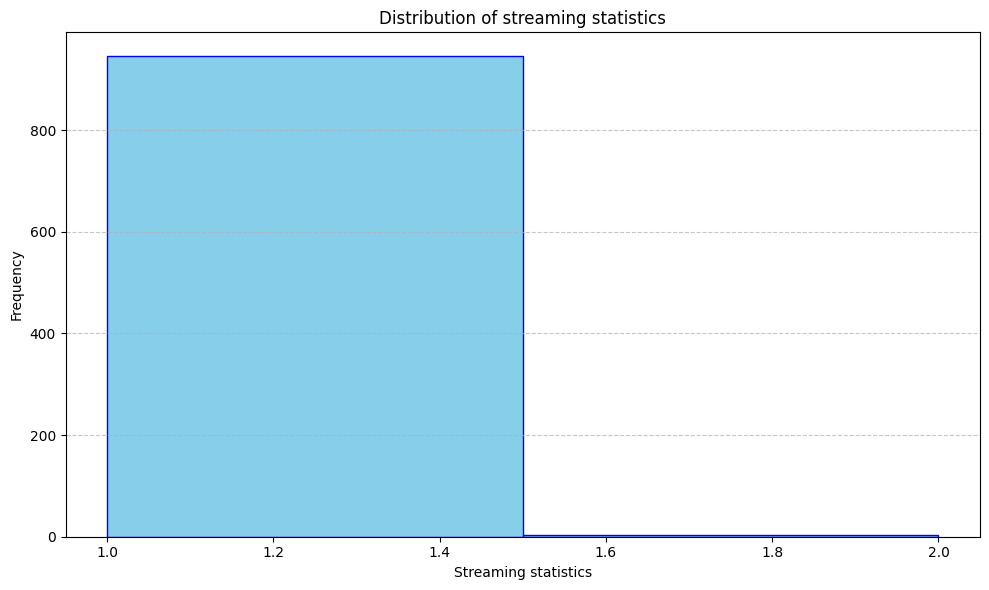

In [376]:
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del grafico
plt.hist(streams, bins=2, color='skyblue', edgecolor='blue')  # Crea l'istogramma
plt.title('Distribution of streaming statistics')  # Imposta il titolo del grafico
plt.xlabel('Streaming statistics')  # Etichetta dell'asse x
plt.ylabel('Frequency')  # Etichetta dell'asse y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Abilita la griglia sull'asse y
plt.tight_layout()  # Ottimizza la disposizione degli assi
plt.show()  # Mostra il grafico

Grafico che mostra il conteggio dei valori unici nella colonna delle statistiche di streaming: value_counts() per contare il numero di occorrenze di ciasun valore nella colonna.

Grafico a dispersione per confrontare le classifiche di Spotify con le classifiche di Apple Music

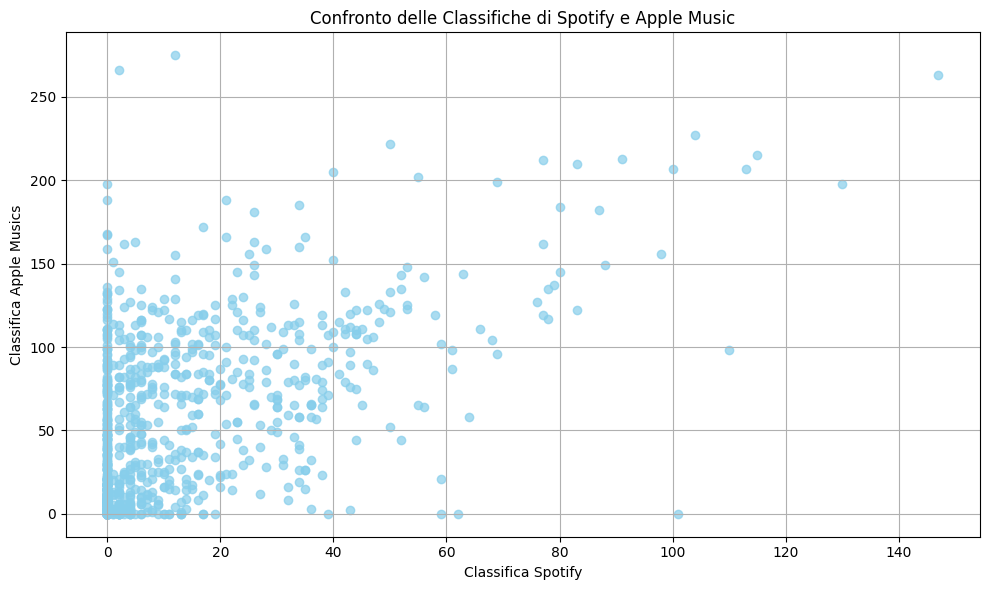

In [283]:
# Grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(spotify_songs_df['in_spotify_charts'], spotify_songs_df['in_apple_charts'], color='skyblue', alpha=0.7)
plt.title('Confronto delle Classifiche di Spotify e Apple Music')
plt.xlabel('Classifica Spotify')
plt.ylabel('Classifica Apple Musics')
plt.grid(True)
plt.tight_layout()
plt.show()

Grafico a barre delle classifiche di Spotify, Apple Music e Shazam che mostra le prime 10 o 20 canzoni in ciascuna classifica e consente di confrontare le posizioni delle canzoni tra le diverse piattaforme 

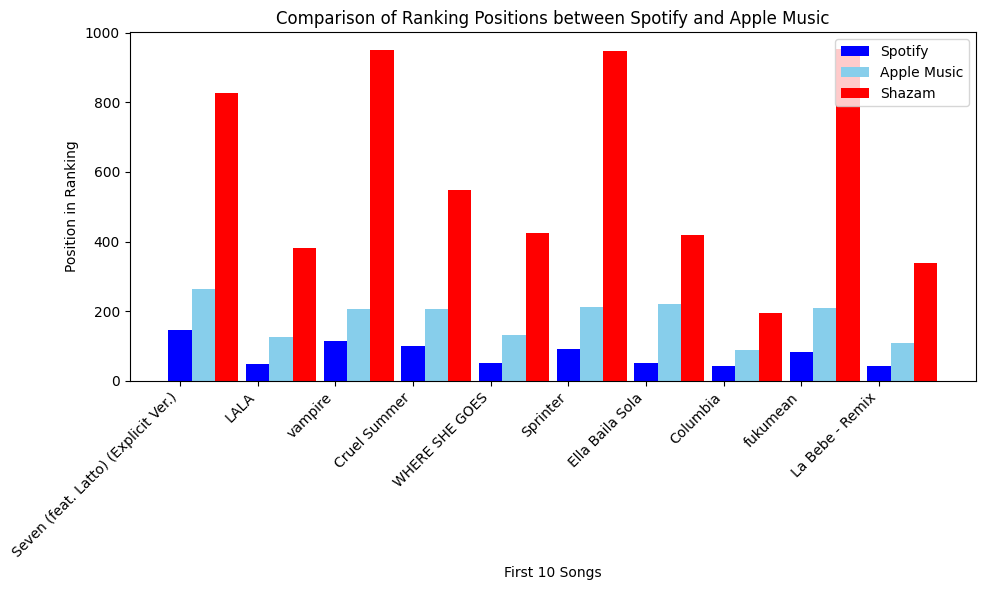

In [393]:
top_songs = spotify_songs_df['track_name'].head(10)
top_spotify = spotify_songs_df['in_spotify_charts'].head(10).tolist()
top_apple = spotify_songs_df['in_apple_charts'].head(10).tolist()
top_shazam = spotify_songs_df['in_shazam_charts'].head(10).tolist()
top_deezer = spotify_songs_df['in_deezer_playlists'].head(10).tolist()

# Larghezza delle barre
bar_width = 0.3

# Definisci l'indice per ciascuna categoria
index = np.arange(len(top_spotify))

# Grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(index, top_spotify, bar_width, color='blue', label='Spotify')
plt.bar(index + bar_width, top_apple, bar_width, color='skyblue', label='Apple Music')
plt.bar(index + 2 * bar_width, top_shazam, bar_width, color='red', label='Shazam')
#plt.bar(index + 3 * bar_width, top_deezer, bar_width, color='orange', label='Deezer')

plt.xlabel('First 10 Songs')
plt.ylabel('Position in Ranking')
plt.title('Comparison of Ranking Positions between Spotify and Apple Music')
plt.xticks(index, top_songs, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [394]:
top_spotify, top_apple, top_shazam, top_deezer

([147, 48, 113, 100, 50, 91, 50, 43, 83, 44],
 [263, 126, 207, 207, 133, 213, 222, 89, 210, 110],
 [826.0, 382.0, 949.0, 548.0, 425.0, 946.0, 418.0, 194.0, 953.0, 339.0],
 ['45', '58', '91', '125', '87', '88', '43', '30', '48', '66'])

si può notare che i dati top_deezer sono molto diversi rispetto agli altri servizi -> quindi considero un grafico con spotify, apple e shazam

Grafico a torta delle playlist più popolari:
- raggruppo le canzoni in base al numero di playlist a cui appartengono
- calcolo il numero di ciascun gruppo
- seleziono i gruppi piu rilevanti
- grafico a torta: come dati utilizzo il numero di canzoni in ciascun gruppo 

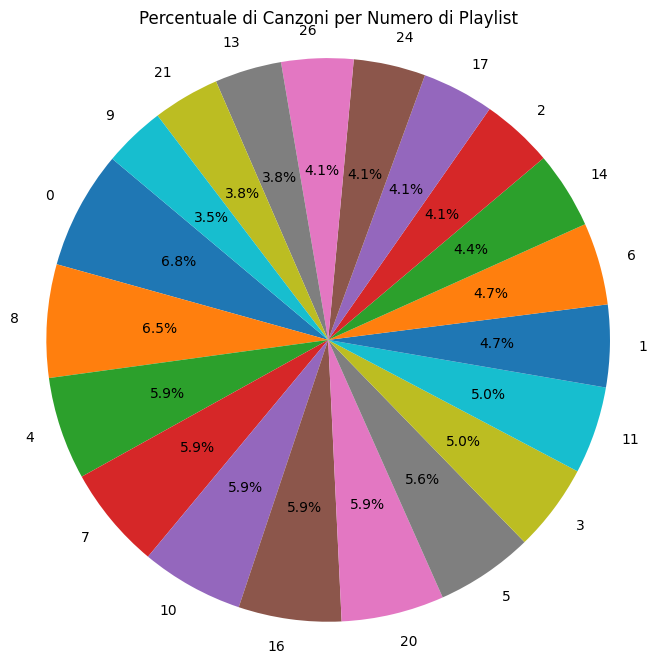

In [265]:
# Raggruppa le canzoni in base al numero di playlist
playlist_counts = spotify_songs_df.groupby('in_apple_playlists').size()
# Seleziona i gruppi più rilevanti (ad esempio, i primi 5 gruppi con il maggior numero di canzoni)
top_groups = playlist_counts.nlargest(20)

# Crea il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(top_groups, labels=top_groups.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentuale di Canzoni per Numero di Playlist')
plt.axis('equal')  # Assicura che il grafico sia un cerchio
plt.show()

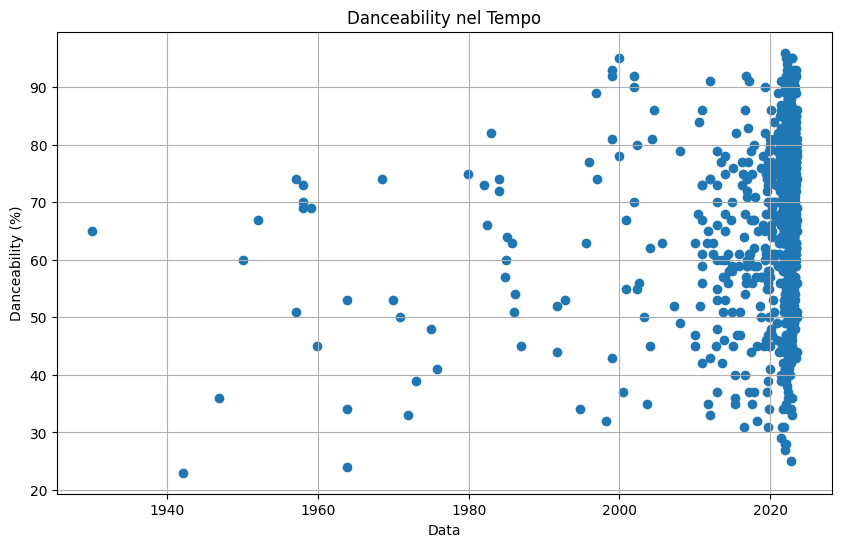

In [290]:
# Grafico a linee per la danceability nel tempo
plt.figure(figsize=(10, 6))
plt.scatter(spotify_songs_df['released_date'], spotify_songs_df['danceability_%'])
plt.xlabel('Data')
plt.ylabel('Danceability (%)')
plt.title('Danceability nel Tempo')
plt.grid(True)
plt.show()

Matrice di correlazione tra le caratteristiche audio come danceability, valence, energy, acousticness, instrumentalness, liveness and speechiness

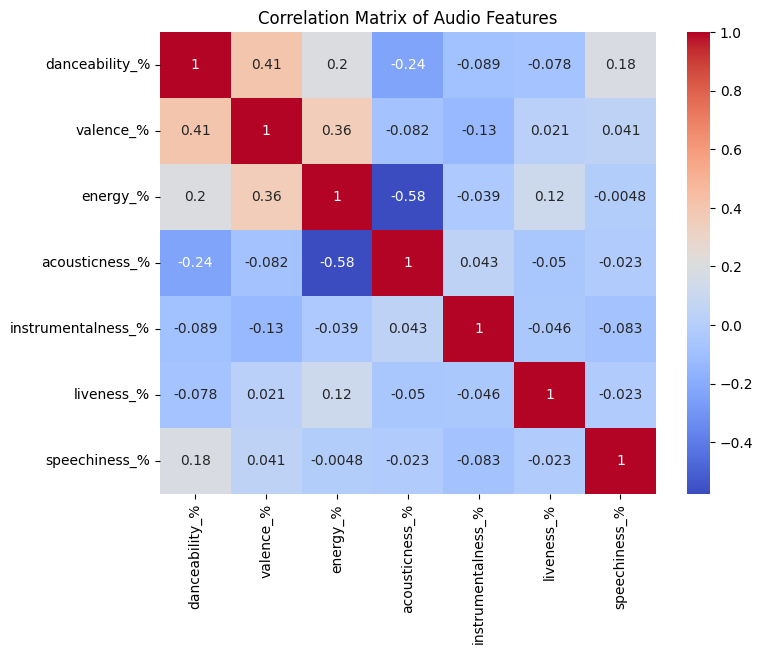

In [300]:
# Seleziona solo le colonne delle caratteristiche audio
audio_features = spotify_songs_df[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

# Calcola la correlazione tra le caratteristiche audio
correlation_matrix = audio_features.corr()

# Crea un grafico a matrice di calore
plt.figure(figsize=(8, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.show()

Se due caratteristiche hanno una forte correlazione positiva, il colore nella matrice sarà più chiaro. Al contrario, se hanno una forte correlazione negativa, il colore sarà più scuro. Una mancanza di correlazione si riflette in colori neutri.
Si osserva che "acousticness_%" e "energy_%" hanno una correlazione negativa, quindi indica che le canzoni acustiche tendono ad avere un livello di energia più basso.
Mentre si può notare che "valence_%" e "energy_%" hanno una forte correlazione positiva, quindi le canzoni con un alto livello di positività tendono anche ad avere un alto livello di energia.

BPM (Beates per minute)
- calcolo delle statistiche descrittive (media, mediana e deviazione standard)
- suddivisione dei brani in categorie di tempo (lento, medio e veloce su diversi intervalli di BPM)
- Visualizzazione delle tendenze nel tempo (come il BMP medio varia nel corso del tempo con un grafico a dispersione)

In [308]:
# Calcola la media del BPM
mean_bpm = spotify_songs_df['bpm'].mean()

# Calcola la mediana del BPM
median_bpm = spotify_songs_df['bpm'].median()

# Calcola la deviazione standard del BPM
std_bpm = spotify_songs_df['bpm'].std()

print("Mean BPM:", mean_bpm)
print("Median BPM:", median_bpm)
print("Standard Deviation of BPM:", std_bpm)

Mean BPM: 122.54039874081847
Median BPM: 121.0
Standard Deviation of BPM: 28.057801508156174


In [320]:
# Definisci gli intervalli di BPM per le categorie di tempo
slow_bpm = (spotify_songs_df['bpm'] < 100).sum()
medium_bpm = ((spotify_songs_df['bpm'] >= 100) & (spotify_songs_df['bpm'] < 130)).sum()
fast_bpm = (spotify_songs_df['bpm'] >= 130).sum()

print("Number of songs with BPM < 100 (Slow):", slow_bpm)
print("Number of songs with BPM between 100 and 120 (Medium):", medium_bpm)
print("Number of songs with BPM >= 120 (Fast):", fast_bpm)


Number of songs with BPM < 100 (Slow): 238
Number of songs with BPM between 100 and 120 (Medium): 345
Number of songs with BPM >= 120 (Fast): 370


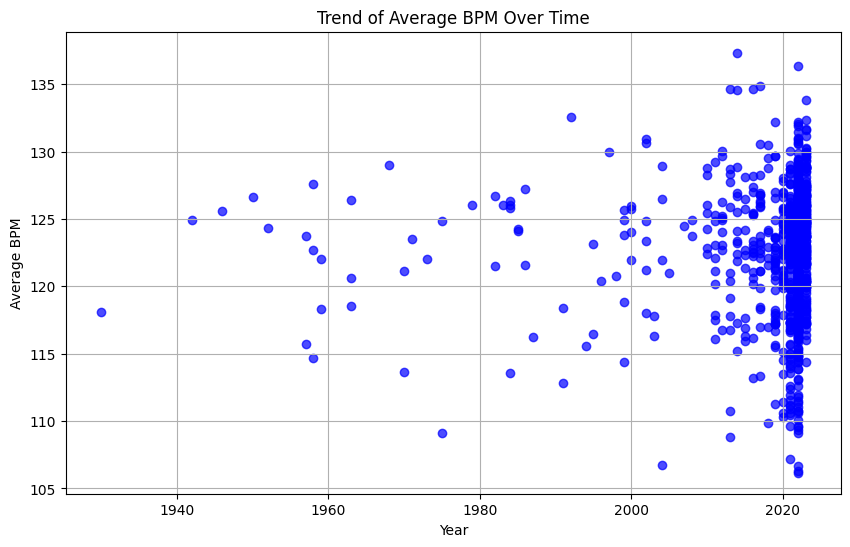

In [327]:
# Traccia un grafico a linee del BPM medio nel tempo
plt.figure(figsize=(10, 6))
plt.scatter(spotify_songs_df['released_year'], spotify_songs_df['bpm'].rolling(window=30).mean(), color='blue', alpha=0.7)
plt.title('Trend of Average BPM Over Time')
plt.xlabel('Year')
plt.ylabel('Average BPM')
plt.grid(True)
plt.show()


Per esaminare la distribuzione delle chiavi musicali nel dataset e creare un grafico a barre che mostra la frequenza delle chiavi musicali nei diversi periodi temporali:
- estrarre i dati relativi alla chiave musicale
- calcolare la frequenza di ciascuna chiave
- crea grafico a barre con plt.bar()

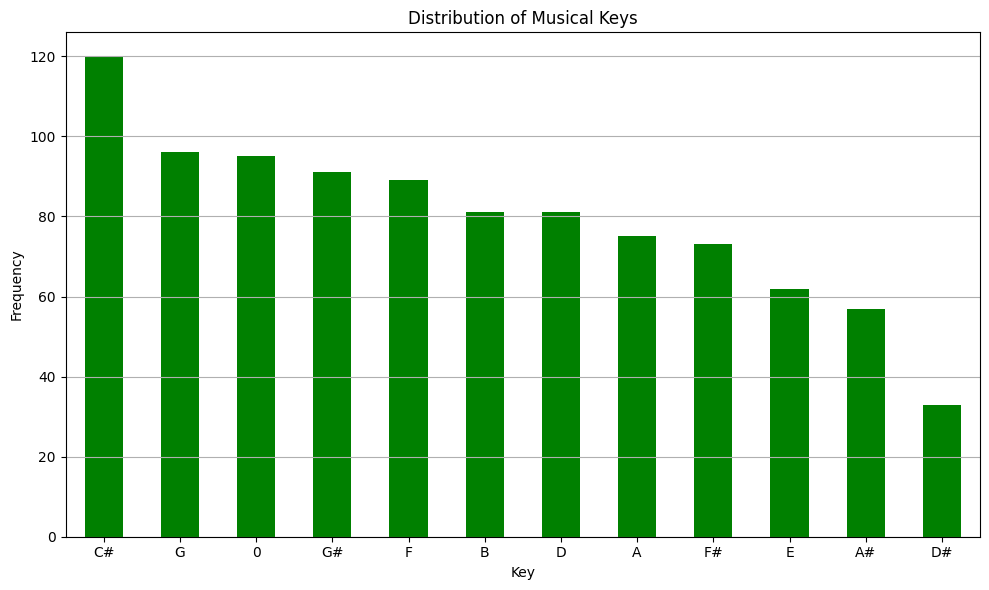

In [350]:
# Estrai i dati relativi alla chiave musicale dal DataFrame
keys = spotify_songs_df['key']

# Calcola la frequenza di ciascuna chiave musicale
key_counts = keys.value_counts()

# Crea il grafico a barre
plt.figure(figsize=(10, 6))
key_counts.plot(kind='bar', color='green')

# Aggiungi etichette, titolo e legenda
plt.xlabel('Key')
plt.ylabel('Frequency')
plt.title('Distribution of Musical Keys')
plt.xticks(rotation=0)  # Assicura che le etichette dell'asse x siano leggibili
plt.grid(axis='y')

# Mostra il grafico
plt.tight_layout()
plt.show()

Per analizzare la distribuzioni dei modi (maggiore o minore) nel dataset e visualizzare le differenze nelle caratteristiche audio tra i brani in modalità maggiore e minore:
- Estrarre i dati relativi alla modalità
- calcolare la frequenza
- Grafici appropriati (boxplot o a barre) per visualizzare le differenze nelle caratteristiche audio tra brani di modalità maggiore o minore

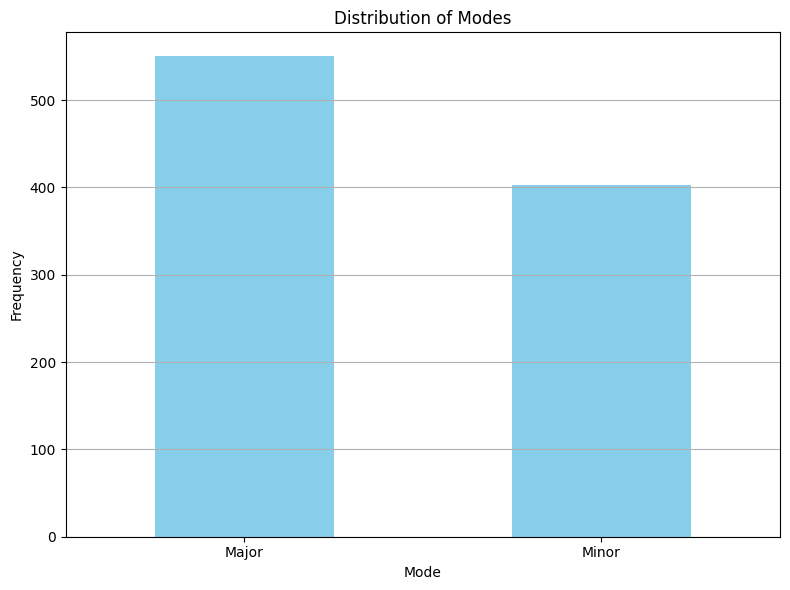

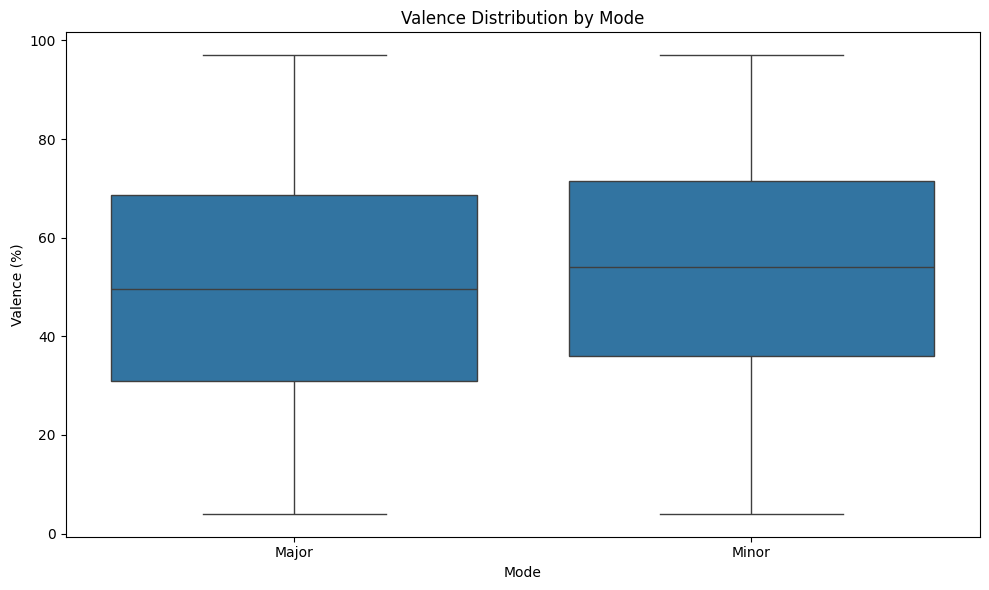

In [329]:
# Estrai i dati relativi alla modalità dal DataFrame
modes = spotify_songs_df['mode']

# Calcola la frequenza di ciascuna modalità nel dataset
mode_counts = modes.value_counts()

# Crea il grafico a barre per visualizzare la distribuzione delle modalità
plt.figure(figsize=(8, 6))
mode_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Mode')
plt.ylabel('Frequency')
plt.title('Distribution of Modes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Esamina le differenze nelle caratteristiche audio tra brani in modalità maggiore e minore
# Ad esempio, visualizza i boxplot delle caratteristiche audio per ciascuna modalità
plt.figure(figsize=(10, 6))
sns.boxplot(x='mode', y='valence_%', data=spotify_songs_df)
plt.xlabel('Mode')
plt.ylabel('Valence (%)')
plt.title('Valence Distribution by Mode')
plt.tight_layout()
plt.show()

Grafico a torta per mostrare la distribuzione percentuale delle canzoni tra diversi artisti:
- Contare quante canzoni ci sono per ogni artista
- Creare il grafico torta

In [334]:
artist_counts = spotify_songs_df['artist(s)_name'].value_counts().head(10)
artist_counts

artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64

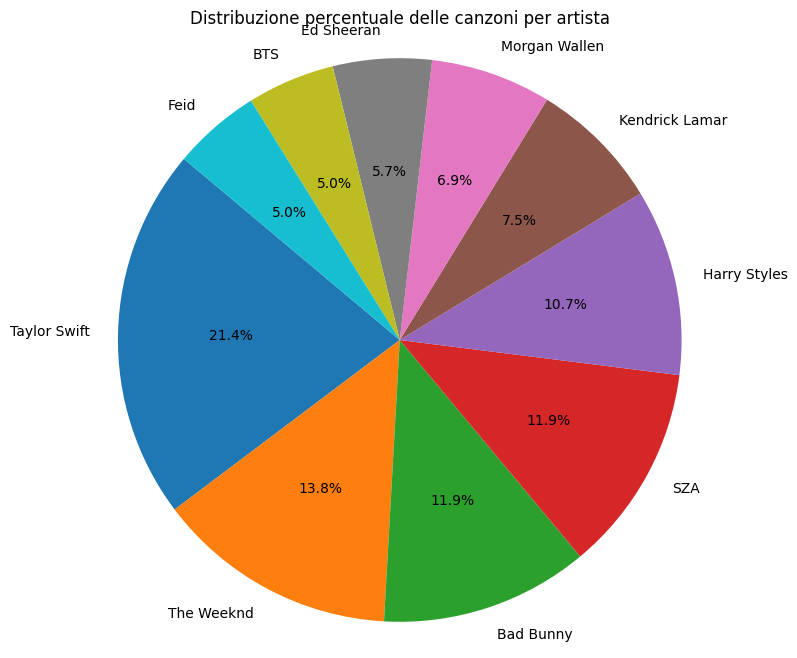

In [335]:
# Crea il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(artist_counts, labels=artist_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuzione percentuale delle canzoni per artista')
plt.axis('equal')  # Assicura che il grafico a torta sia circolare
plt.show()

Questo grafico ci mostra la percentuale delle canzoni per i primi 10 artisti del Dataset -> il/la cantante con percentuale maggiore è Taylor Swift

Grafico a barre per visualizzare il conteggio delle canzoni in base al numero di artisti coinvolti.
In una canzone il numero massimo di artisti coinvolti è 8 e il numero minimo è 1. Si può vedere dal grafico che la maggior parte delle canzoni coinvolgono solo un artista

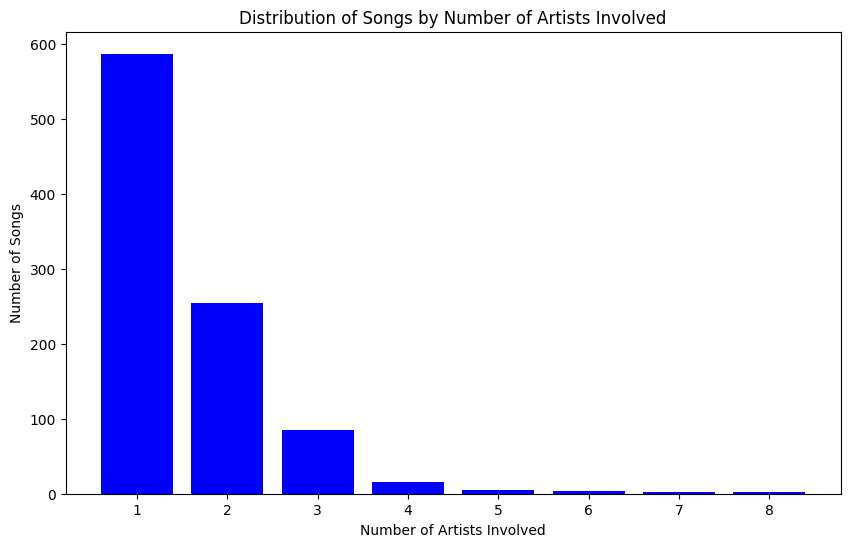

In [343]:
artist_count_counts = spotify_songs_df['artist_count'].value_counts()

# Traccia il grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(artist_count_counts.index, artist_count_counts.values, color='blue')
plt.xlabel('Number of Artists Involved')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Number of Artists Involved')
plt.xticks(artist_count_counts.index)
plt.show()

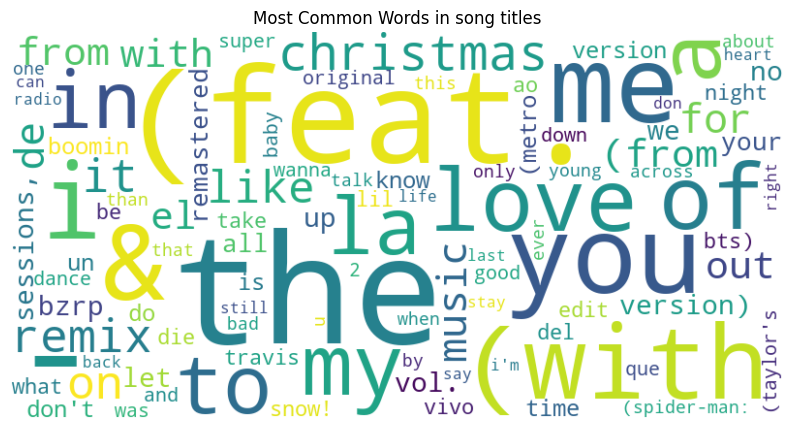

In [349]:
from collections import Counter
from wordcloud import WordCloud

# Estrai le parole dai testi delle canzoni
all_lyrics = ' '.join(spotify_songs_df['track_name'].dropna())

# Tokenizza le parole
words = all_lyrics.lower().split()

# Calcola la frequenza di ogni parola
word_freq = Counter(words)

# Seleziona le parole più comuni
top_words = word_freq.most_common(100)

# Crea una word cloud per visualizzare le parole più comuni
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Traccia la word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear') #utilizzato per migliorare la qualità
plt.axis('off')
plt.title('Most Common Words in song titles')
plt.show()